In [19]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

In [20]:
L = 16
N = int(1e6)
sigma = 10

#x = (np.arange(L) < L / 2).astype("float64")
#x = np.random.normal(size=L)
x = np.exp(4 * np.cos(2 * np.pi * np.arange(L) / L))

cs = np.random.randint(0, L, size=N)
xs = np.stack([np.roll(x, c) for c in cs])

ys = xs + sigma * np.random.normal(size=(N, L))

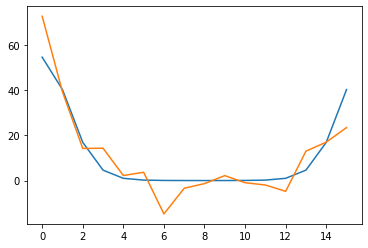

In [21]:
plt.plot(x)
plt.plot(np.roll(ys[0], -cs[0]))
plt.show()

In [22]:
ρs = np.fft.ifft(np.fft.fft(x).conj() * np.fft.fft(ys)).real

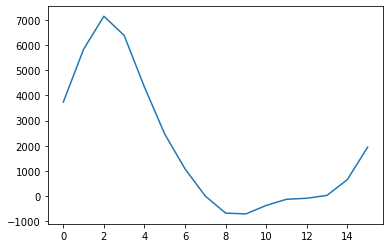

In [23]:
plt.plot(ρs[0])
plt.show()

In [7]:
cs_est = np.argmax(ρs, axis=-1)

In [8]:
cs_est[:8]

array([ 0,  4,  4,  6,  6,  5, 12, 15])

In [9]:
cs[:8]

array([ 0,  4,  4,  6,  6,  5, 12,  0])

In [10]:
prop_correct = np.mean(cs_est == cs)
print(f"{prop_correct=}")

prop_correct=0.967675


In [11]:
var = sigma ** 2 * np.linalg.norm(x) ** 2
var_est = np.var(ρs)

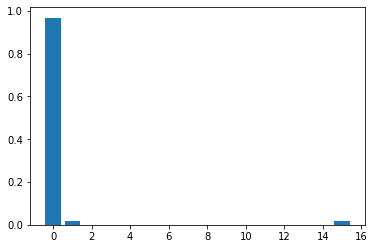

In [12]:
counts = np.array([np.sum(np.mod(cs - cs_est, L) == k) for k in range(L)])
plt.bar(np.arange(L), counts / N)
plt.show()

In [13]:
ys_shifted = np.stack([np.roll(ys[k], -cs_est[k]) for k in range(N)])
xs_est = np.mean(ys_shifted, axis=0)
xs_est = xs_est / np.linalg.norm(xs_est) * np.linalg.norm(x)

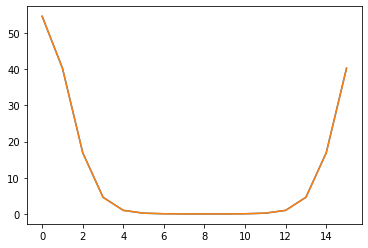

In [14]:
plt.plot(x)
plt.plot(xs_est)
plt.show()

In [15]:
np.linalg.norm(x - xs_est) / L

0.005050075846371973